# **Instrucciones para examen**
**Objetivo:** Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

**Contexto y Descripción del Dataset**

El «[Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

**Diccionario de Datos:**

1.  **Pregnancies:** Número de embarazos.
2.  **Glucose:** Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
3.  **BloodPressure:** Presión arterial diastólica (mm Hg).
4.  **SkinThickness:** Espesor del pliegue cutáneo del tríceps (mm).
5.  **Insulin:** Niveles séricos de insulina a las 2 horas (mu U/ml).
6.  **BMI:** Índice de masa corporal (peso en kg / (altura en m)^2).
7.  **DiabetesPedigreeFunction:** Función de pedigrí de diabetes.
8.  **Age:** Edad (años).
9.  **Outcome:** Variable objetivo (1: diabetes, 0: no diabetes).
**Requisitos**

1.  **Limpieza de Datos:**
* **Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* **Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* **Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* **Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.
2.  **Exploración de Datos:**
* **Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* **Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.
3.  **Implementación de Modelos:**
* **Modelos de Clasificación:** Implementa modelos de Random Forest y XGBoost.
* **Evaluación de Modelos:** Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
* **Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [ ]:
!pip install lazypredict

In [ ]:
import pandas as pd
import numpy as np
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Cargar el dataset
from google.colab import drive
drive.mount('/content/drive')
URL = "/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Examenes/Archivos CSV/diabetes.csv"
df = pd.read_csv(URL)

# Separar features (X) y variable objetivo (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y ajustar el clasificador lazy
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_train, predictions_train = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Mostrar los resultados
print("\nRendimiento de los modelos:")
print(models_train)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 31/31 [00:01<00:00, 15.81it/s]

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Primeras 5 filas del DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0 33.60   
1            1       85             66             29        0 26.60   
2            8      183             64              0        0 23.30   
3            1       89             66             23       94 28.10   
4            0      137             40             35      168 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1  

Ultimas 5 filas del DataFrame:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101          

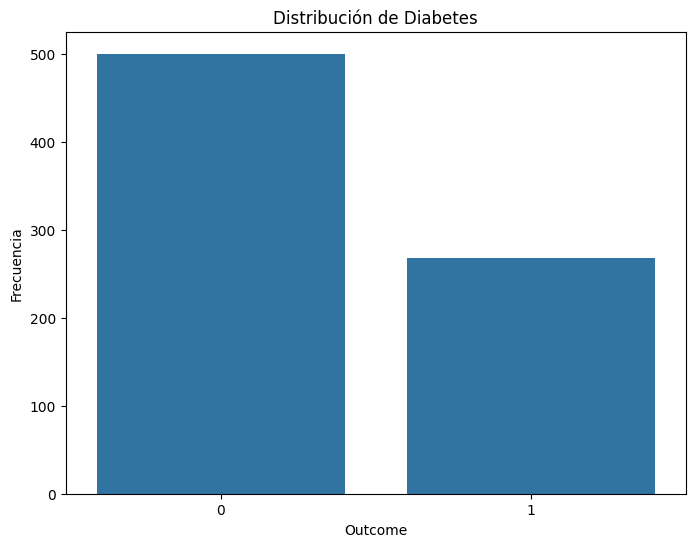


Distribución de Diabetes (Countplot)
* El gráfico de barras muestra la distribución de la variable 'Outcome'
* Se observa un claro desbalance en las clases:
    - Aproximadamente 500 pacientes sin diabetes (clase 0)
    - Aproximadamente 268 pacientes con diabetes (clase 1)
* Esta proporción aproximada de 65%-35% indica que el dataset está desbalanceado, lo cual es importante considerar para el modelado



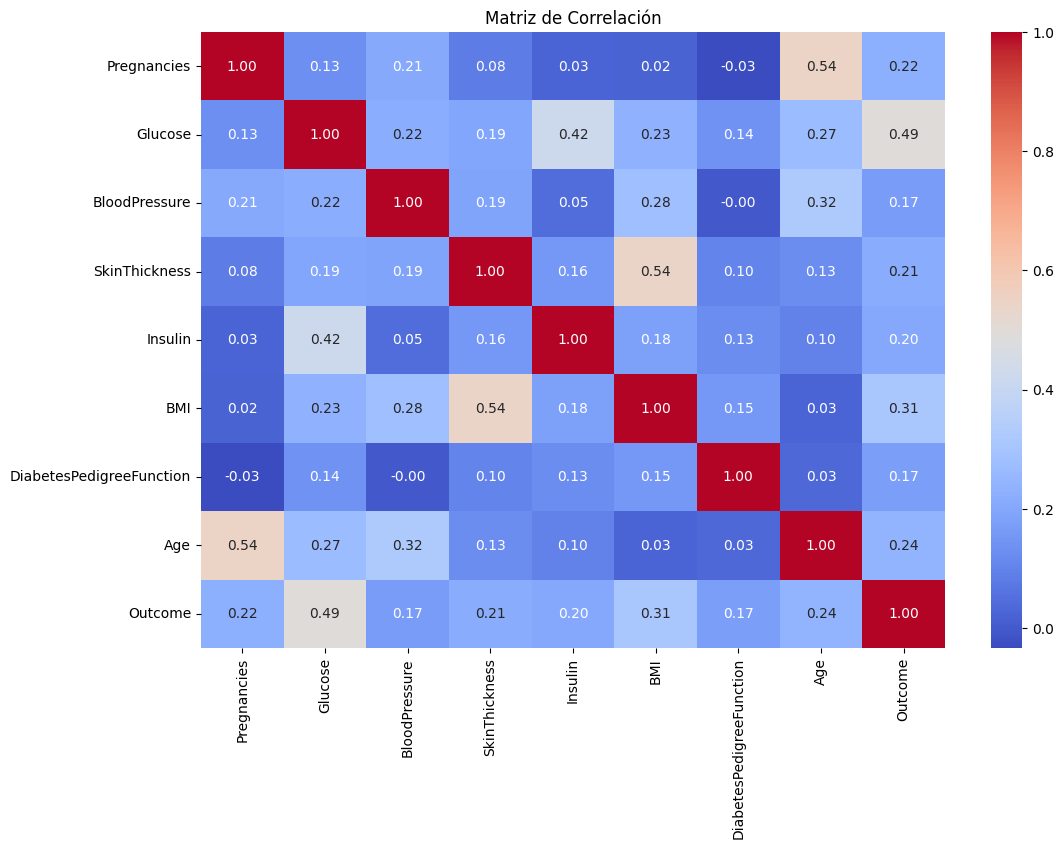


Matriz de Correlación (Heatmap)
* Los colores más intensos en rojo indican correlaciones positivas fuertes, mientras que los azules indican correlaciones negativas
* Las correlaciones más fuertes con la diabetes (Outcome) son:
    - Glucose: correlación positiva de 0.49
    - BMI: correlación positiva de 0.31
    - Age: correlación positiva de 0.24
    - Pregnancies: correlación positiva de 0.22
* Entre variables predictoras:
    -Age y Pregnancies muestran correlación positiva moderada
    -SkinThickness y BMI tienen correlación positiva moderada
    -Insulin y SkinThickness también muestran correlación positiva



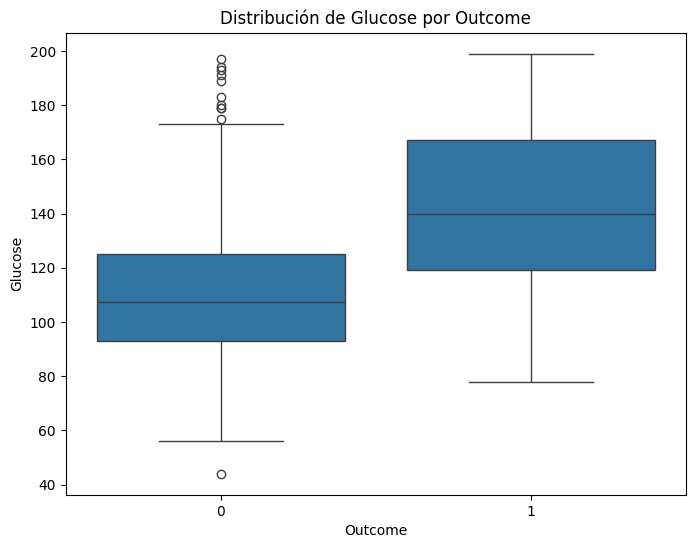


Glucose por Outcome: Los pacientes con diabetes (1) tienen niveles de glucosa notablemente más altos



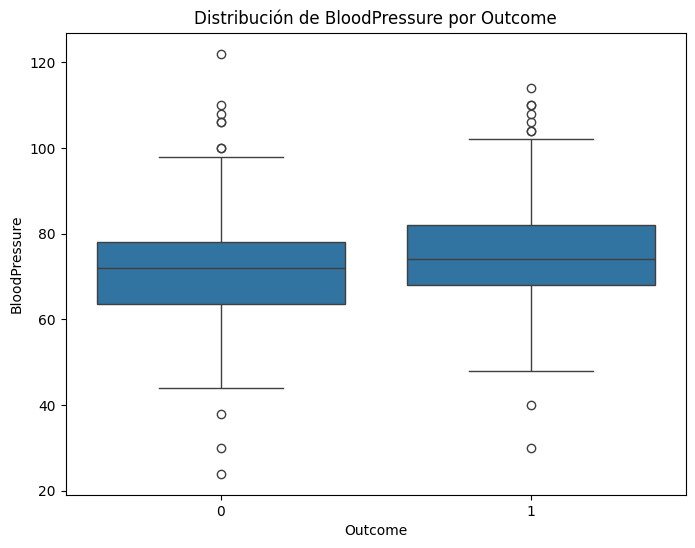


BloodPressure por Outcome: Hay una ligera tendencia a presión arterial más alta en pacientes con diabetes



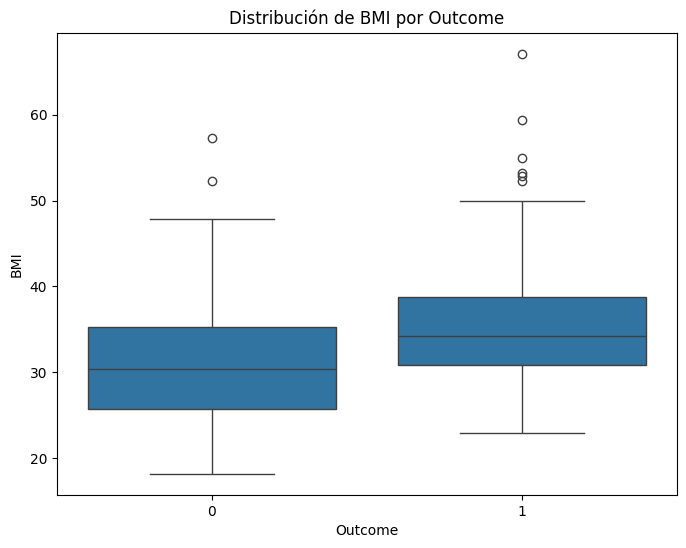


SkinThickness por Outcome: Los pacientes con diabetes tienden a tener valores ligeramente más altos


Resultados para Random Forest:
Accuracy: 0.734
Precision: 0.625
Recall: 0.636
F1-score: 0.631
ROC-AUC: 0.712

Matriz de Confusión:
[[78 21]
 [20 35]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


Resultados para XGBoost:
Accuracy: 0.714
Precision: 0.587
Recall: 0.673
F1-score: 0.627
ROC-AUC: 0.705

Matriz de Confusión:
[[73 26]
 [18 37]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   

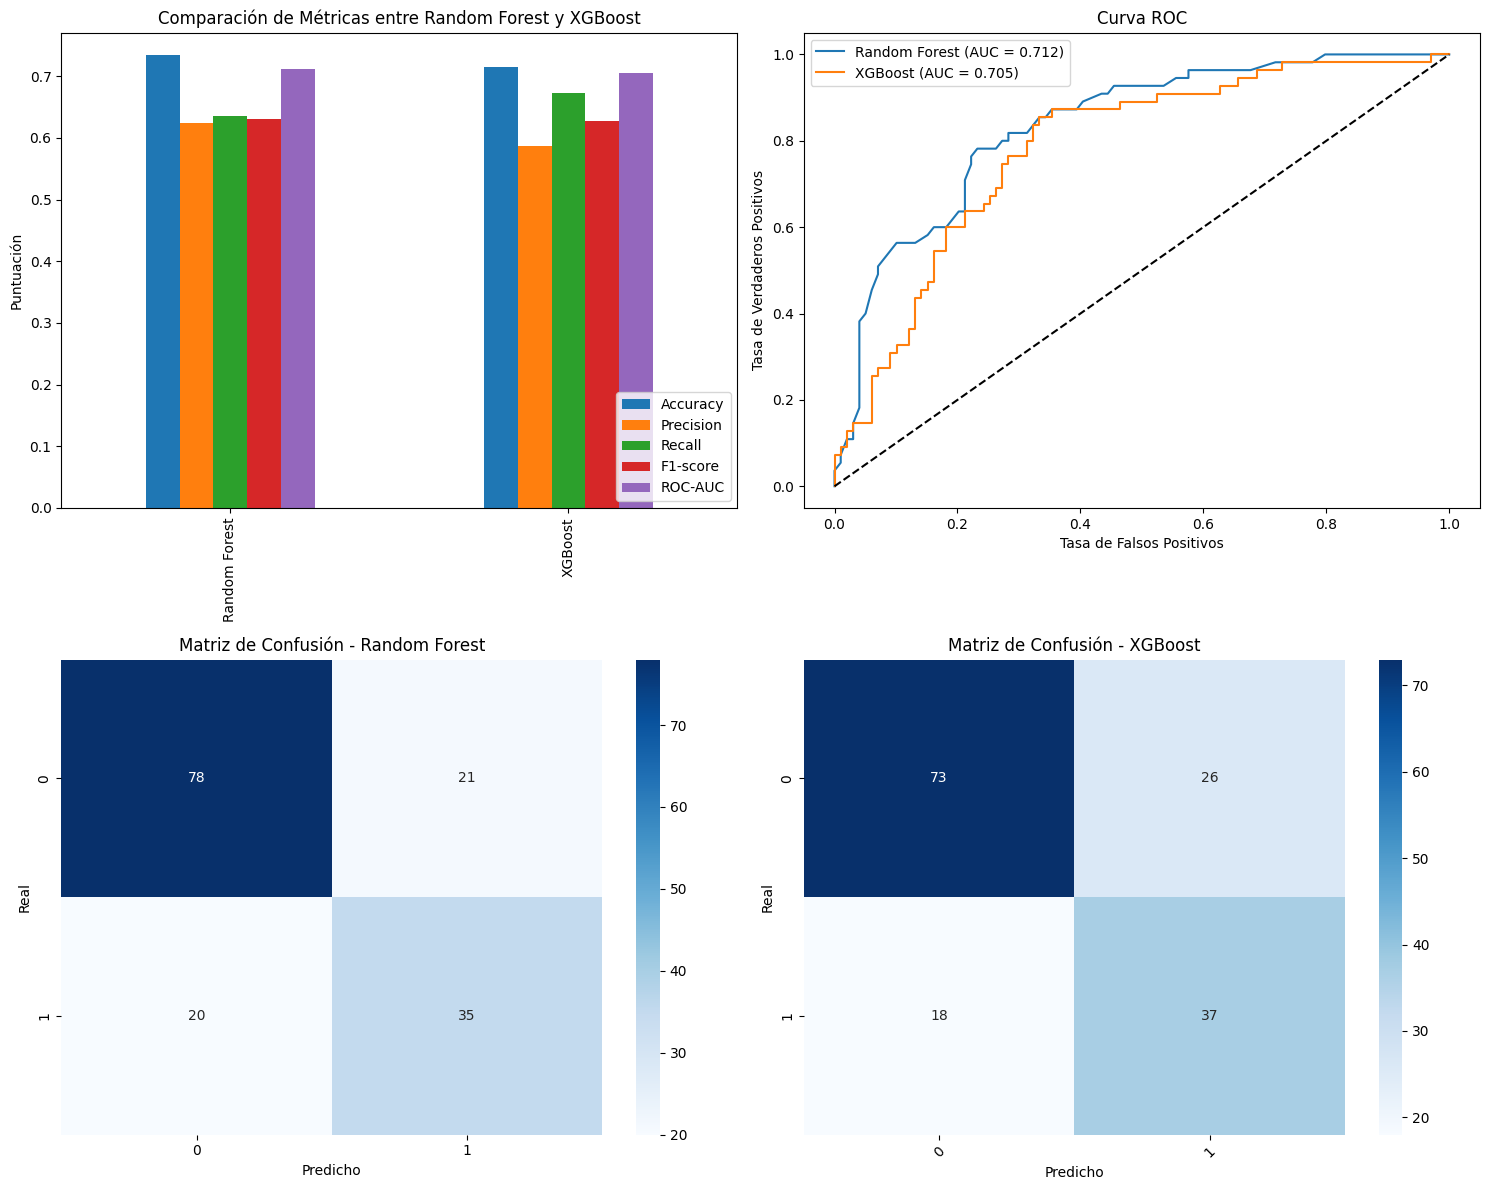

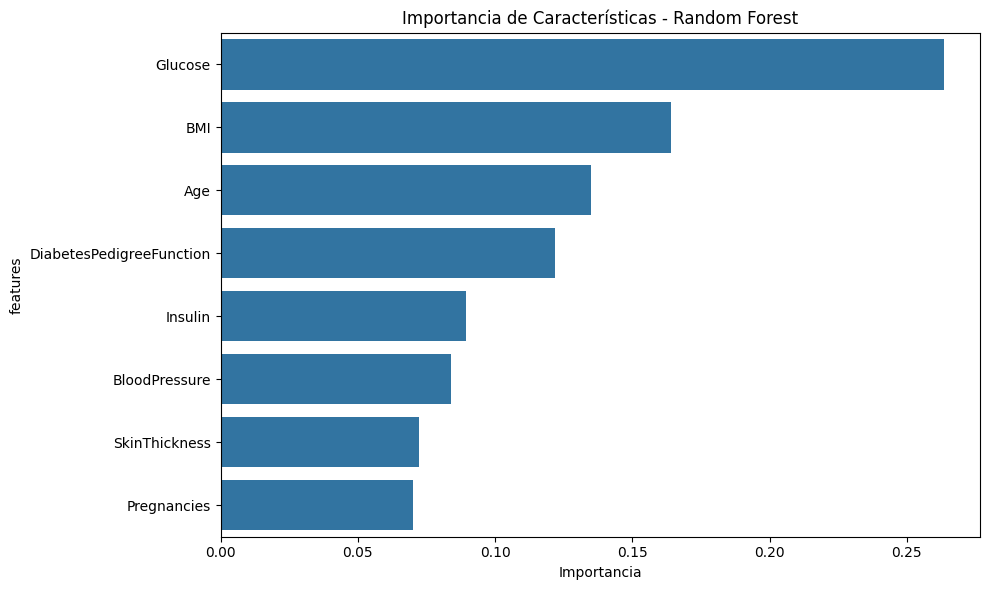

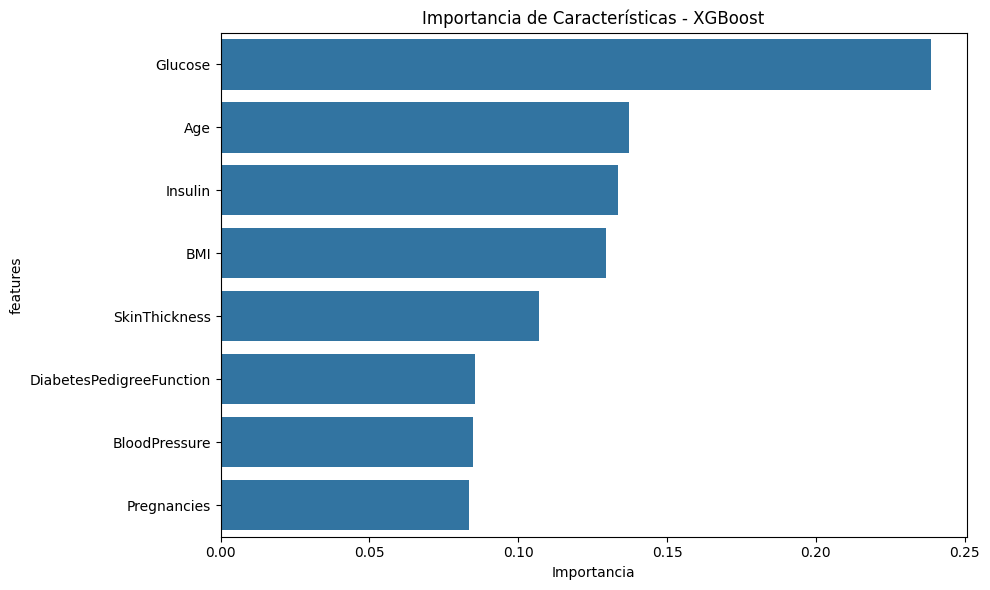


Gráfico de Importancia de Características (Random Forest) y (XGBoost)
Esta visualización completa nos permite entender que:
La glucosa es el indicador más crucial para el diagnóstico
Existen patrones claros de diferencia entre pacientes con y sin diabetes
Algunas variables como el embarazo y el grosor de la piel tienen menor relevancia.
La presencia de valores atípicos y el desbalance de clases son aspectos importantes a considerar en el modelado



In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# 1. Limpieza de Datos
# Cargar datos
from google.colab import drive
drive.mount('/content/drive')
URL = "/content/drive/MyDrive/Bootcamp Coding Dojo/DataScience/Examenes/Archivos CSV/diabetes.csv"
df = pd.read_csv(URL)

# Primeros Datos
print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

# Ultimos Datos
print("\nUltimas 5 filas del DataFrame:")
print(df.tail())

# 1.1 Identificación de duplicados
n_duplicados = df.duplicated().sum()
print(f"Número de duplicados: {n_duplicados}")
df = df.drop_duplicates()
print(f"Dimensiones del dataset después de eliminar duplicados: {df.shape}")

# 1.2 Verificación de tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# 1.3 Análisis de valores faltantes y ceros que deberían ser NaN
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Convertir ceros a NaN en columnas específicas donde 0 no es válido
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_check:
    df[column] = df[column].replace(0, np.nan)

print("\nValores faltantes después de convertir ceros:")
print(df.isnull().sum())

# 1.4 Imputación de valores faltantes usando la mediana
for column in columns_to_check:
    df[column].fillna(df[column].median(), inplace=True)

# 2. Exploración de Datos
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# 2.1 Visualizaciones univariadas y multivariadas

# Gráfico 1: Distribución de Diabetes (Countplot)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Outcome')
plt.title('Distribución de Diabetes')
plt.xlabel('Outcome')
plt.ylabel('Frecuencia')
plt.show()
print("""
Distribución de Diabetes (Countplot)
* El gráfico de barras muestra la distribución de la variable 'Outcome'
* Se observa un claro desbalance en las clases:
    - Aproximadamente 500 pacientes sin diabetes (clase 0)
    - Aproximadamente 268 pacientes con diabetes (clase 1)
* Esta proporción aproximada de 65%-35% indica que el dataset está desbalanceado, lo cual es importante considerar para el modelado
""")

# Gráfico 2: Matriz de Correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()
print("""
Matriz de Correlación (Heatmap)
* Los colores más intensos en rojo indican correlaciones positivas fuertes, mientras que los azules indican correlaciones negativas
* Las correlaciones más fuertes con la diabetes (Outcome) son:
    - Glucose: correlación positiva de 0.49
    - BMI: correlación positiva de 0.31
    - Age: correlación positiva de 0.24
    - Pregnancies: correlación positiva de 0.22
* Entre variables predictoras:
    -Age y Pregnancies muestran correlación positiva moderada
    -SkinThickness y BMI tienen correlación positiva moderada
    -Insulin y SkinThickness también muestran correlación positiva
""")

# Gráfico 3: Distribución de Glucose por Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outcome', y='Glucose')
plt.title('Distribución de Glucose por Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()
print("""
Glucose por Outcome: Los pacientes con diabetes (1) tienen niveles de glucosa notablemente más altos
""")

# Gráfico 4: Distribución de BloodPressure por Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outcome', y='BloodPressure')
plt.title('Distribución de BloodPressure por Outcome')
plt.xlabel('Outcome')
plt.ylabel('BloodPressure')
plt.show()
print("""
BloodPressure por Outcome: Hay una ligera tendencia a presión arterial más alta en pacientes con diabetes
""")
# Gráfico 5: Distribución de BMI por Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outcome', y='BMI')
plt.title('Distribución de BMI por Outcome')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()
print("""
SkinThickness por Outcome: Los pacientes con diabetes tienden a tener valores ligeramente más altos
""")

# 3. Implementación de Modelos
# 3.1 Preparación de datos
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3.2 Entrenamiento y evaluación de modelos
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Entrenamiento
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"\nResultados para {model_name}:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")

    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))

    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred))

    return model

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest")

# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model = evaluate_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, "XGBoost")

# 3.3 Comparación de Rendimientos
# Crear visualizaciones
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Crear DataFrame para las métricas
rf_metrics = {
    'Accuracy': accuracy_score(y_test, rf_model.predict(X_test_scaled)),
    'Precision': precision_score(y_test, rf_model.predict(X_test_scaled)),
    'Recall': recall_score(y_test, rf_model.predict(X_test_scaled)),
    'F1-score': f1_score(y_test, rf_model.predict(X_test_scaled)),
    'ROC-AUC': roc_auc_score(y_test, rf_model.predict(X_test_scaled))
}

xgb_metrics = {
    'Accuracy': accuracy_score(y_test, xgb_model.predict(X_test_scaled)),
    'Precision': precision_score(y_test, xgb_model.predict(X_test_scaled)),
    'Recall': recall_score(y_test, xgb_model.predict(X_test_scaled)),
    'F1-score': f1_score(y_test, xgb_model.predict(X_test_scaled)),
    'ROC-AUC': roc_auc_score(y_test, xgb_model.predict(X_test_scaled))
}

metrics_df = pd.DataFrame([rf_metrics, xgb_metrics], index=['Random Forest', 'XGBoost'])

# 1. Gráfico de barras comparativo
metrics_df.plot(kind='bar', ax=ax1)
ax1.set_title('Comparación de Métricas entre Random Forest y XGBoost')
ax1.set_ylabel('Puntuación')
ax1.legend(loc='lower right')
plt.xticks(rotation=45)

# Predicciones para Random Forest y XGBoost
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
rf_pred = rf_model.predict(X_test_scaled)
xgb_pred = xgb_model.predict(X_test_scaled)

# 2. Curvas ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)

ax2.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_metrics["ROC-AUC"]:.3f})')
ax2.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_metrics["ROC-AUC"]:.3f})')
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_xlabel('Tasa de Falsos Positivos')
ax2.set_ylabel('Tasa de Verdaderos Positivos')
ax2.set_title('Curva ROC')
ax2.legend()

# 3. Matrices de confusión
def plot_confusion_matrix(y_true, y_pred, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_xlabel('Predicho')
    ax.set_ylabel('Real')
    ax.set_title(title)

plot_confusion_matrix(y_test, rf_pred, ax3, 'Matriz de Confusión - Random Forest')
plot_confusion_matrix(y_test, xgb_pred, ax4, 'Matriz de Confusión - XGBoost')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las métricas en formato tabular
print("\nMétricas de evaluación:")
print(metrics_df.round(3))

# Guardar la figura
plt.savefig('comparacion_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

# Importancia de características
def plot_feature_importance(model, title):
    importances = pd.DataFrame({
        'features': X.columns,
        'importance': model.feature_importances_
    })
    importances = importances.sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='features', data=importances)
    plt.title(f'Importancia de Características - {title}')
    plt.xlabel('Importancia')
    plt.tight_layout()
    plt.show()

# Mostrar importancia de características para ambos modelos
plot_feature_importance(rf_model, 'Random Forest')
plot_feature_importance(xgb_model, 'XGBoost')

print("""
Gráfico de Importancia de Características (Random Forest) y (XGBoost)
Esta visualización completa nos permite entender que:
La glucosa es el indicador más crucial para el diagnóstico
Existen patrones claros de diferencia entre pacientes con y sin diabetes
Algunas variables como el embarazo y el grosor de la piel tienen menor relevancia.
La presencia de valores atípicos y el desbalance de clases son aspectos importantes a considerar en el modelado
""")



# **Análisis del Gráfico Comparativo de Modelos**
El gráfico muestra una comparación entre dos modelos de aprendizaje automático: Random Forest y XGBoost.

**Gráfico de Barras Comparativo**
Este gráfico compara las siguientes métricas para ambos modelos:

* **Accuracy (Precisión):** Medida de la exactitud general de las predicciones del modelo.

* Precision (Precisión):** Medida de la precisión de las predicciones positivas del modelo.

* **Recall (Sensibilidad):** Medida de la capacidad del modelo para identificar correctamente las instancias positivas.

* **F1-score:** Media armónica de la precisión y la sensibilidad.

* **ROC-AUC:** Área bajo la curva ROC, que mide la capacidad del modelo para distinguir entre clases.


---



Para el modelo **Random Forest**, las puntuaciones son:

Accuracy: 0.73

Precision: 0.62

Recall: 0.64

F1-score: 0.63

ROC-AUC: 0.71

Para el modelo **XGBoost**, las puntuaciones son:

Accuracy: 0.71

Precision: 0.59

Recall: 0.67

F1-score: 0.63

ROC-AUC: 0.70


---



**Curva ROC**

La curva ROC muestra el rendimiento de ambos modelos en términos de tasa de verdaderos positivos (TPR) y tasa de falsos positivos (FPR). La curva ROC para Random Forest tiene un AUC de 0.712, mientras que la curva ROC para XGBoost tiene un AUC de 0.705.

# **Conclusión**

**Random Forest** parece ser ligeramente mejor que **XGBoost** en este dataset, ya que:

Tiene un ROC-AUC ligeramente superior (0.712 frente a 0.705).

Mejores puntuaciones en la mayoría de las métricas (Accuracy, Precision, F1-score).

En resumen, basado en el gráfico y las métricas comparativas, **Random Forest** es el modelo más adecuado para este conjunto de datos.